In [1]:
import csv
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from matplotlib import dates

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("Final Project Data.csv")

In [4]:
# drop columns that are not needed 
data = data.drop(columns=['Email Address'])

In [5]:
data[['Date', 'Time']] = data['Timestamp'].str.split(' ', expand=True)

In [6]:
# reorder data by animal
data = data.sort_values(by='Animal', ascending=True)

In [7]:
data.head()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
45,5/31/2025 16:03:07,bear 1,2,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,02:53,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07
50,5/31/2025 16:09:54,bear 1,2,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Couple,00:21,Neutral,NaN,5/31/2025,16:09:54
49,5/31/2025 16:08:25,bear 1,4,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Friends,00:15,Neutral,NaN,5/31/2025,16:08:25
48,5/31/2025 16:07:45,bear 1,4,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,00:31,Excitment,NaN,5/31/2025,16:07:45
47,5/31/2025 16:07:06,bear 1,2,"Standing on four legs (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Couple,00:08,Neutral,NaN,5/31/2025,16:07:06


In [8]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [9]:
data.describe()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
count,154,154,154,153,154,154,154,154,17,154,154
unique,154,9,5,26,23,5,68,3,17,3,154
top,5/31/2025 16:03:07,reptile 2,2,"Sleeping (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Family w/ kids,00:15,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07
freq,1,30,79,42,41,58,7,124,1,67,1


/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_65701/1653743573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x="Animal",


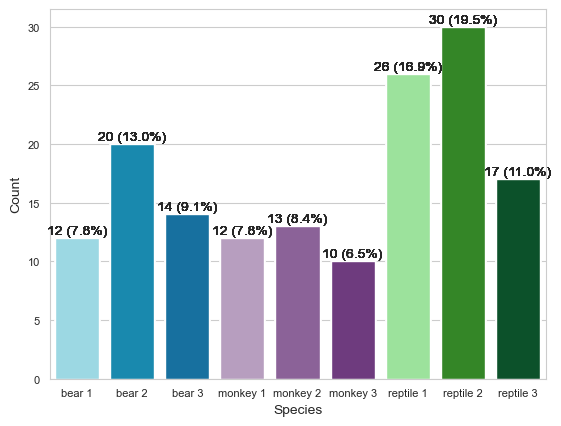

In [10]:
custom_palette = {"bear 1": "#90E0EF", "bear 2": "#0096C7", "bear 3": "#0077B6", 
                  "reptile 1": "#90EE90", "reptile 2": "#299617", "reptile 3": "#005C29", 
                  "monkey 1": "#BA98C4", "monkey 2": "#9059A1", "monkey 3": "#743089"}
ax = sns.countplot(data, x="Animal", 
                   order=data['Animal'].sort_values(),
                   palette=custom_palette)

plt.xlabel("Species")
plt.ylabel("Count")

plt.tick_params(labelsize=8)

# Add percentages and counts to the bars
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{math.floor(height)} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

In [11]:
# Convert time strings to Timedelta (in seconds) (useed AI for this code)
data['time_in_seconds'] = pd.to_timedelta('00:' + data['Interaction Length'])  # Prefix with '00:' for hours
data['time_in_seconds'] = data['time_in_seconds'].dt.total_seconds() # Get total seconds

# Normalize to a single day for simpler plotting
data['normalized_time'] = pd.to_datetime('2000-01-01') + pd.to_timedelta(data['time_in_seconds'], unit='s')

data.head()


,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time,time_in_seconds,normalized_time
45,5/31/2025 16:03:07,bear 1,2,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,02:53,Neutral,Zoo keeper feeding. Fans starting.,5/31/2025,16:03:07,173.0,2000-01-01 00:02:53
50,5/31/2025 16:09:54,bear 1,2,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Couple,00:21,Neutral,NaN,5/31/2025,16:09:54,21.0,2000-01-01 00:00:21
49,5/31/2025 16:08:25,bear 1,4,"Standing on four legs (reptile, monkey, bear)",Observing animal behavior,Friends,00:15,Neutral,NaN,5/31/2025,16:08:25,15.0,2000-01-01 00:00:15
48,5/31/2025 16:07:45,bear 1,4,"Eating (reptile, monkey, bear), Standing on fo...","Observing animal behavior, Taking pictures of ...",Friends,00:31,Excitment,NaN,5/31/2025,16:07:45,31.0,2000-01-01 00:00:31
47,5/31/2025 16:07:06,bear 1,2,"Standing on four legs (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Couple,00:08,Neutral,NaN,5/31/2025,16:07:06,8.0,2000-01-01 00:00:08


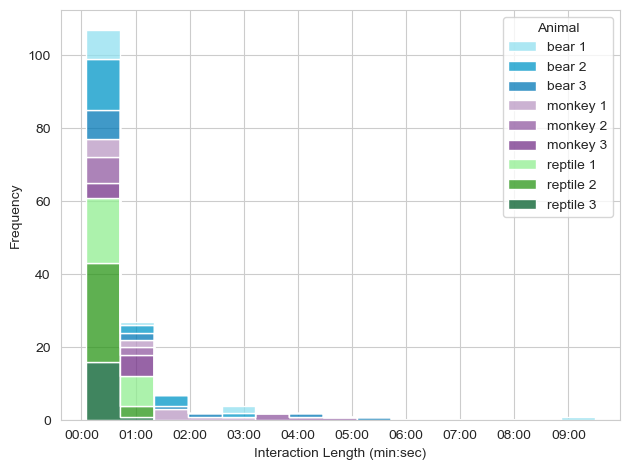

In [12]:
# graph of interaction length
ax = sns.histplot(data, x="normalized_time", hue="Animal", multiple="stack", bins=15, element="step", palette=custom_palette)
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))

plt.tight_layout()

plt.show()

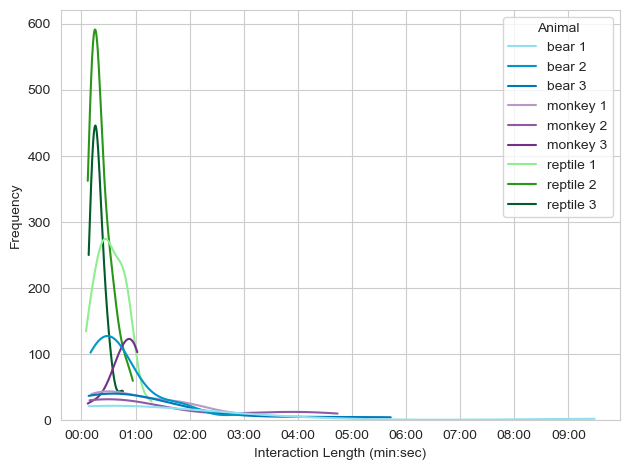

In [13]:
# graph of interaction length
ax = sns.kdeplot(data, x="normalized_time", hue="Animal", cut=0, palette=custom_palette)
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))

plt.tight_layout()

plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_65701/3439535093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x="# of people interacting", palette="Blues", order=data['# of people interacting'].sort_values().unique())


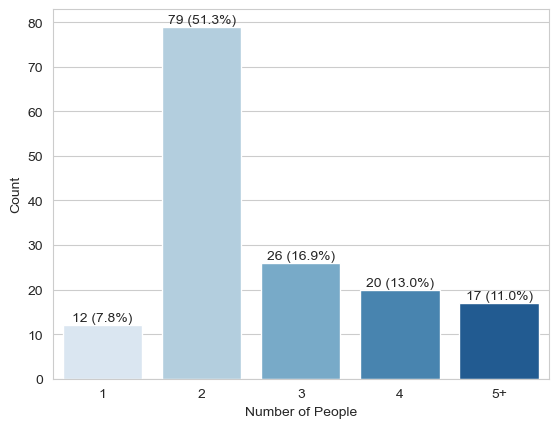

In [14]:
# coutplot of # of people interacting

ax = sns.countplot(data, x="# of people interacting", palette="Blues", order=data['# of people interacting'].sort_values().unique())
plt.xlabel("Number of People")
plt.ylabel("Count")

# Add percentages and counts to the bars

total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{math.floor(height)} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

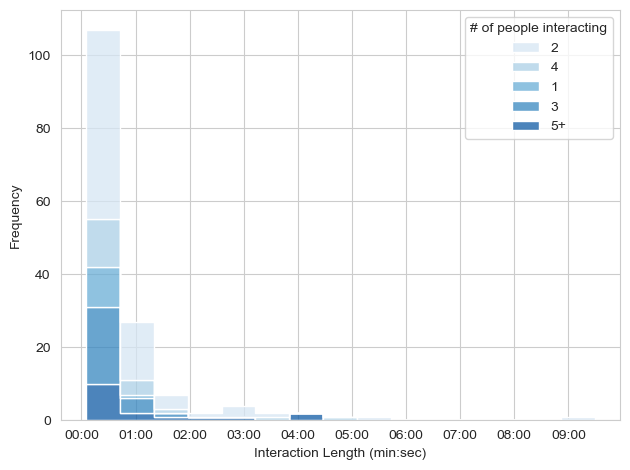

In [15]:
# graph of interaction length by number of people interacting
ax = sns.histplot(data, x="normalized_time", hue="# of people interacting", multiple="stack", bins=15, element="step", palette="Blues")
plt.xlabel("Interaction Length (min:sec)")
plt.ylabel("Frequency")

# Set x-axis format to mm:ss
ax.xaxis.set_major_formatter(dates.DateFormatter('%M:%S'))
plt.tight_layout()
plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_65701/4194289771.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=data_counts, x='Weekday vs Weekend', y='percentage', hue='# of people interacting', palette="Blues", ci=None)


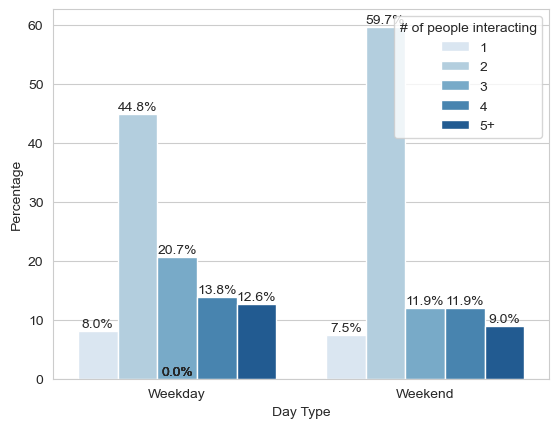

In [16]:
# graph of number of people interacting by weekend vs weekday

data['Weekday vs Weekend'] = pd.to_datetime(data['Date']).dt.day_name()
data['Weekday vs Weekend'] = np.where(data['Weekday vs Weekend'].isin(['Saturday', 'Sunday']), 'Weekend', 'Weekday')

# normalize the data for weekend vs weekday to only be percentages
data_counts = data.groupby(['Weekday vs Weekend', '# of people interacting']).size().reset_index(name='count')
data_counts['percentage'] = data_counts['count'] / data_counts.groupby('Weekday vs Weekend')['count'].transform('sum') * 100

ax = sns.barplot(data=data_counts, x='Weekday vs Weekend', y='percentage', hue='# of people interacting', palette="Blues", ci=None)
plt.xlabel("Day Type")
plt.ylabel("Percentage")

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    percentage = height
    ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_65701/2821420840.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_interact, palette="Blues", order=data_interact.value_counts().index)


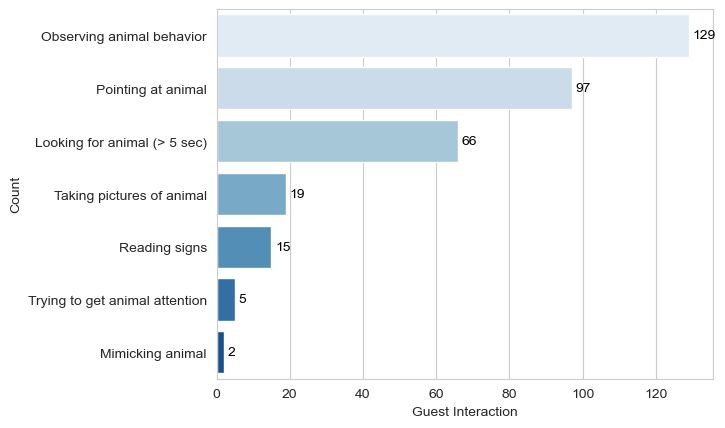

In [17]:
# graph of guest interaction

# split data by commas
data_interact = data['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact = data_interact.explode('Guest Interaction')

# Remove anything only mentioned once
data_interact = data_interact[data_interact.isin(data_interact.value_counts()[data_interact.value_counts() > 1].index)]

ax = sns.countplot(data_interact, palette="Blues", order=data_interact.value_counts().index)
    
plt.xlabel("Guest Interaction")
plt.ylabel("Count")

# Add percentages and counts to the bars
for i, v in enumerate(data_interact.value_counts()):
    ax.text(v + 1, i, f'{v}', color='black', va='center')


plt.show()

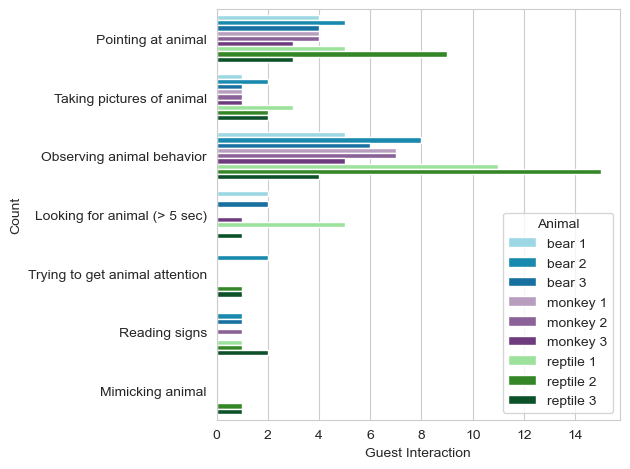

In [18]:
# graph of guest interaction by animal

data_interact_animal = data[['Animal', 'Guest Interaction']].dropna()

# split data by commas
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].explode('Guest Interaction')

# Remove anything only mentioned once
data_interact_animal = data_interact_animal[data_interact_animal['Guest Interaction'].isin(data_interact_animal['Guest Interaction'].value_counts()[data_interact_animal['Guest Interaction'].value_counts() > 1].index)]

# normalize the data to be percantages of the animal mentioned
data_interact_animal_counts = data_interact_animal.groupby(['Animal', 'Guest Interaction']).size().reset_index(name='count')
data_interact_animal_counts['percentage'] = data_interact_animal_counts['count'] / data_interact_animal_counts.groupby('Animal')['count'].transform('sum') * 100


ax = sns.countplot(data=data_interact_animal, y='Guest Interaction', hue='Animal', palette=custom_palette)
plt.xlabel("Guest Interaction")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

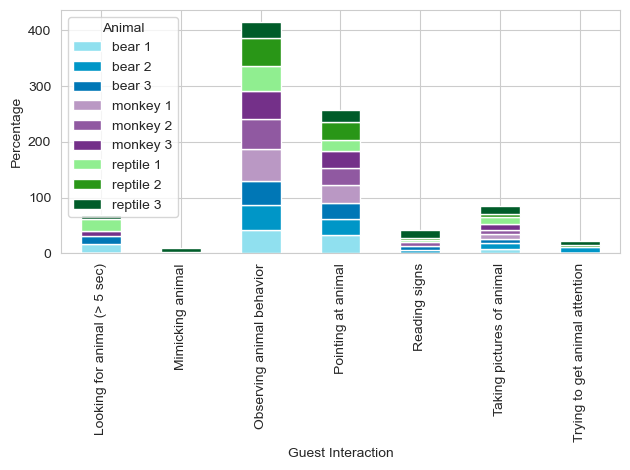

In [20]:
# graph of guest interaction by animal

data_interact_animal = data[['Animal', 'Guest Interaction']].dropna()

# split data by commas
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].explode('Guest Interaction')

# Remove anything only mentioned once
data_interact_animal = data_interact_animal[data_interact_animal['Guest Interaction'].isin(data_interact_animal['Guest Interaction'].value_counts()[data_interact_animal['Guest Interaction'].value_counts() > 1].index)]

# normalize the data to be percentages of the animal mentioned
data_interact_animal_counts = data_interact_animal.groupby(['Animal', 'Guest Interaction']).size().reset_index(name='count')
data_interact_animal_counts['percentage'] = data_interact_animal_counts['count'] / data_interact_animal_counts.groupby('Animal')['count'].transform('sum') * 100

pivot_table = data_interact_animal_counts.pivot(index='Guest Interaction', columns='Animal', values='percentage').fillna(0)
pivot_table.plot(kind='bar', stacked=True, color=[custom_palette.get(animal) for animal in pivot_table.columns])
plt.xlabel("Guest Interaction")
plt.ylabel("Percentage")
plt.legend(title='Animal')
plt.tight_layout()
plt.show()

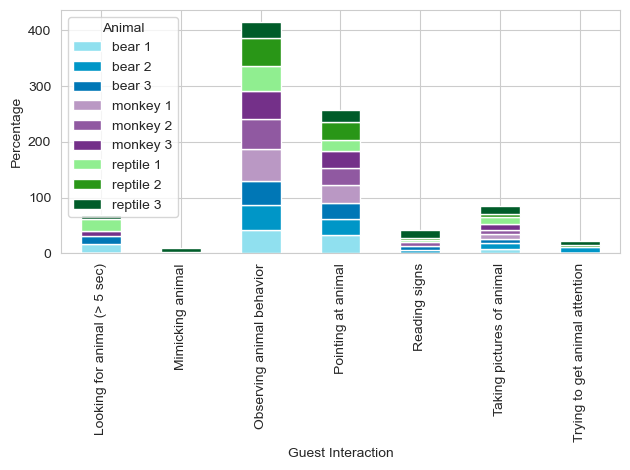

In [ ]:
# graph of guest interaction by animal

data_interact_animal = data[['Animal', 'Guest Interaction']].dropna()

# split data by commas
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].str.split(',').apply(lambda x: [i.strip() for i in x])
data_interact_animal['Guest Interaction'] = data_interact_animal['Guest Interaction'].explode('Guest Interaction')

# Remove anything only mentioned once
data_interact_animal = data_interact_animal[data_interact_animal['Guest Interaction'].isin(data_interact_animal['Guest Interaction'].value_counts()[data_interact_animal['Guest Interaction'].value_counts() > 1].index)]

# normalize the data to be percentages of the animal mentioned
data_interact_animal_counts = data_interact_animal.groupby(['Animal', 'Guest Interaction']).size().reset_index(name='count')
data_interact_animal_counts['percentage'] = data_interact_animal_counts['count'] / data_interact_animal_counts.groupby('Animal')['count'].transform('sum') * 100

pivot_table = data_interact_animal_counts.pivot(index='Guest Interaction', columns='Animal', values='percentage').fillna(0)
pivot_table.plot(kind='bar', stacked=True, color=[custom_palette.get(animal) for animal in pivot_table.columns])
plt.xlabel("Guest Interaction")
plt.ylabel("Percentage")
plt.legend(title='Animal')
plt.tight_layout()
plt.show()